# <center>WINE QUALITY PREDICTION 🍷

![image](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRbhXDPd1QgAKI04P4tSQaZXwLy-L9fXOlGLS-WjSrgzF1OtmVsnKksW6ZApw&s)

##### Explanation of the variables of the dataset

    
    
    
fixed acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily). Acidity is a characteristic determined by the total sum of acids that a sample contains. We can quantify the set of all of them in an undifferentiated way (total acidity) or in a grouped way (fixed acidity and volatile acidity). Fixed acidity corresponds to the set of low volatility organic acids such as malic, lactic, tartaric or citric acids and is inherent to the characteristics of the sample.

volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste. Volatile acidity corresponds to the set of short chain organic acids that can be extracted from the sample by means of a distillation process: formic acid, acetic acid, propionic acid and butyric acid.

citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines. Citric acid is a colorless weak organic acid. It occurs naturally in citrus fruits. In biochemistry, it is an intermediate in the citric acid cycle, which occurs in the metabolism of all aerobic organisms.

residual sugar: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter. Residual sugar refers to the sugars left unfermented in a finished wine. It is measured by grams of sugar per litre (g/l). The amount of residual sugar affects a wine's sweetness and, in the EU, the RS level is linked to specific labelling terms.

chlorides: the amount of salt in the wine. The higher extraction of chloride during red winemaking is due to the ions extracted from skins during fermentation. Therefore, red juice should have no more than 356mg/L chloride ions so that finished wine does not exceed the maximum legal level of 606mg/L chloride(356mg/L in red juice x 1.7 = 606).

free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion. What is free sulphur dioxide in wine? The free sulfites are those available to react and thus exhibit both germicidal and antioxidant properties. The bound sulfites are those that have reacted (both reversibly and irreversibly) with other molecules within the wine medium. The sum of the free and bound sulfites defines the total sulfite concentration.

total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2. Simply put, Total Sulfur Dioxide (TSO2) is the portion of SO2 that is free in the wine plus the portion that is bound to other chemicals in the wine such as aldehydes, pigments, or sugars.

density: the density of water is close to that of water depending on the percent alcohol and sugar content. How do you measure the density of wine? A hydrometer is an instrument used to measure liquid density. It is a sealed glass tube with a weighted bulb at one end, winemakers use this instrument to measure density of juice, fermenting wine and completed wine in relation to pure water. This ratio is called specific gravity (SG).

pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4. What is a high pH in wine? Wines which have higher pH values (>3.65) have a series of potential challenges during vinification and aging. First, high pH wines have an increased chance of microbial spoilage. Traditionally, sulfur dioxide (often in the form of potassium metabisulfite) is used to keep wines stable during aging.

sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial. Wine sulfites are naturally occurring at low levels in all wines, and are one of the thousands of chemical by-products created during the fermentation process. However, sulfites are also added by the winemaker to preserve and protect the wine from bacteria and yeast-laden invasions. For some, sulfur allergies may be associated with headaches and stuffy sinuses after a glass or two of wine. It is a a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial.

Alcohol: this is the percent alcohol content of the wine

quality: output variable (based on sensory data, score between 3 and 8)

In [1]:

import pandas as pd  
import numpy as np  
import seaborn as sns 
import matplotlib.pyplot as plt 


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler 


import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import scipy.stats as st


from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve


from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score


from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
pip install termcolor


Note: you may need to restart the kernel to use updated packages.


In [3]:
from termcolor import colored

In [4]:
df=pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.shape

(1599, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.duplicated().sum()

240

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
volatile acidity,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
citric acid,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
residual sugar,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
chlorides,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
free sulfur dioxide,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
total sulfur dioxide,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
density,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
pH,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
sulphates,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


What can we see from this statistic?

The average value of fixed acidity is 8.31, the highest value is 15.9

The average value of volatile acidity is 0.52, the highest value is 1.58

The average value of citric acid is 0.27, the highest value is 1

The average value of residual sugar is 2.53, the highest value is 15.5

The average value of chlorides is 0.08, the highest value is 0.61

The average value of free sulfur dioxide is 15.87, the highest value is 72

The average value of total sulfur dioxide is 46.46, the highest value is 289

The average value of density is 0.99, the highest value is 1

The average value of pH is 3.31, the highest value is 4.01

The average value of sulphates is 0.65, the highest value is 2

The average value of alcohol is 10.42, the highest value is 14.90

The average value of quality is 5.63, the highest value is 8

In [11]:
df.isnull().mean()*100

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

In [12]:
df.rename(columns = {
    "fixed acidity": "fixed_acidity",
    "volatile acidity": "volatile_acidity",
    "citric acid": "citric_acid",
    "residual sugar": "residual_sugar",
    "chlorides": "chlorides", 
    "free sulfur dioxide": "free_sulfur_dioxide",
    "total sulfur dioxide": "total_sulfur_dioxide"
},inplace = True)

In [13]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


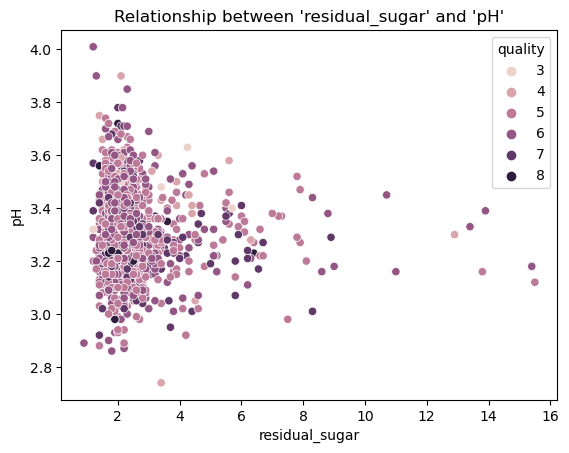

In [14]:
sns.scatterplot(x = "residual_sugar",
                y = "pH",
                hue = "quality",
                data = df).set(title = "Relationship between 'residual_sugar' and 'pH'");

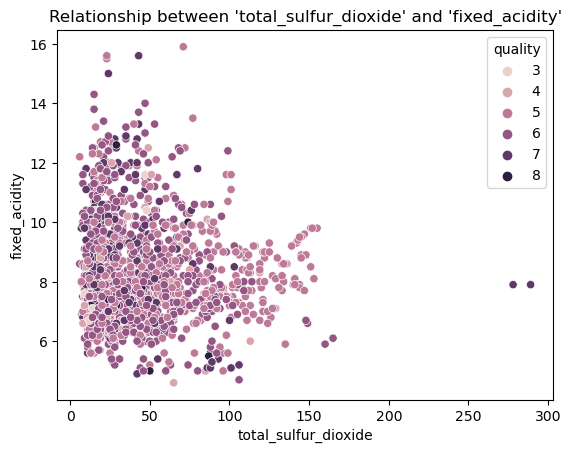

In [15]:
sns.scatterplot(x = "total_sulfur_dioxide",
                y = "fixed_acidity",
                hue = "quality",
                data = df).set(title = "Relationship between 'total_sulfur_dioxide' and 'fixed_acidity'");

[Text(0.5, 1.0, "'alcohol'vs'residual_sugar'")]

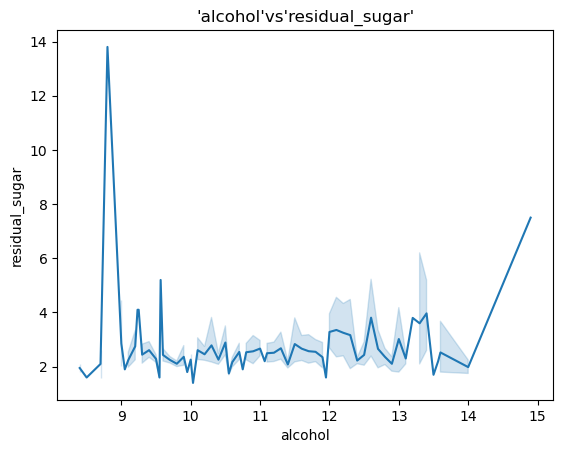

In [16]:
sns.lineplot(x=df.alcohol,y=df.residual_sugar).set(title ="'alcohol'vs'residual_sugar'")

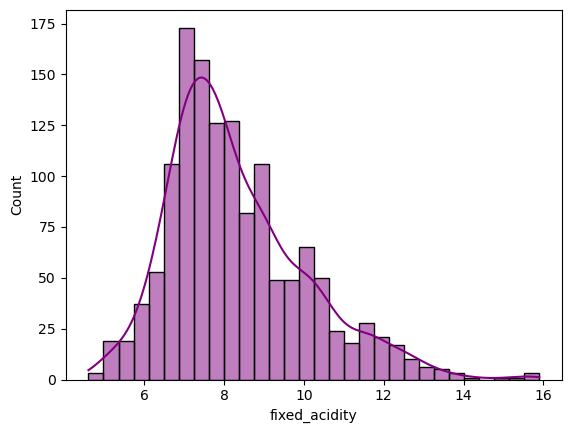

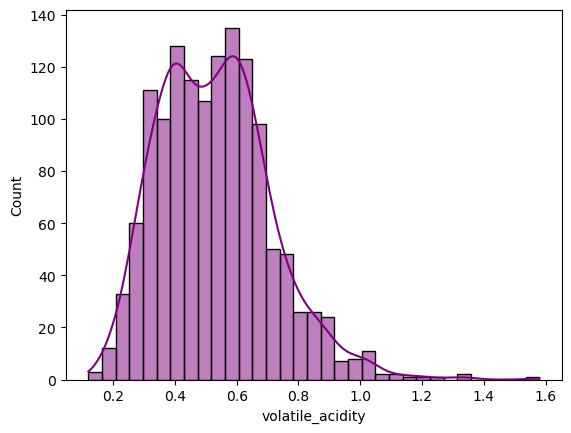

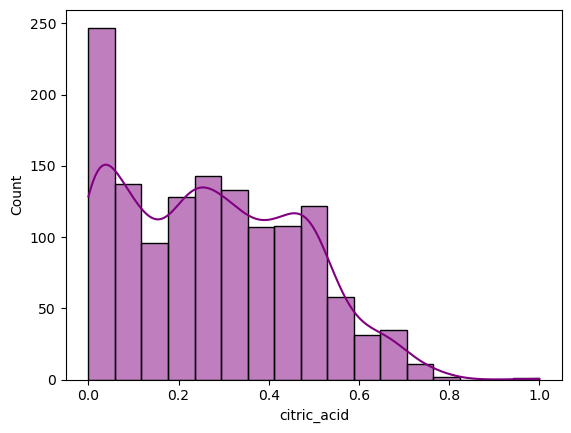

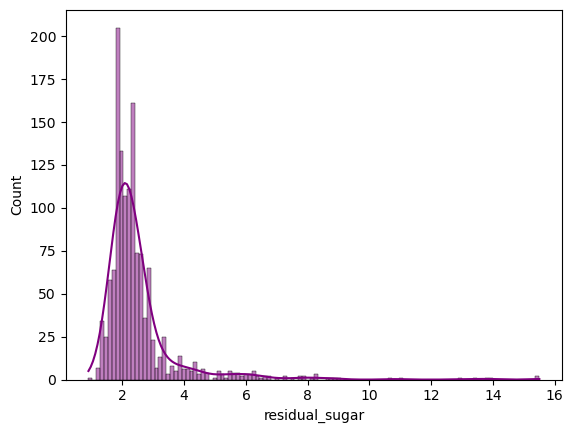

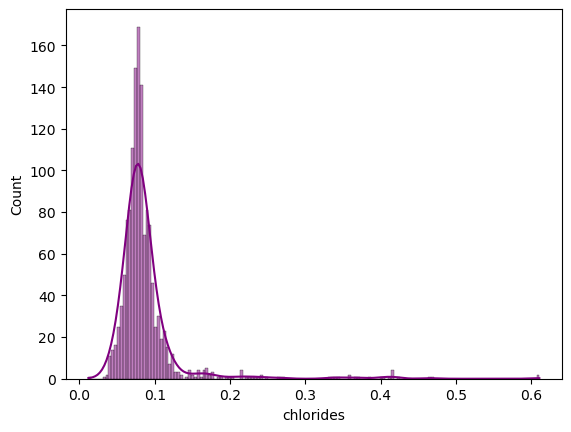

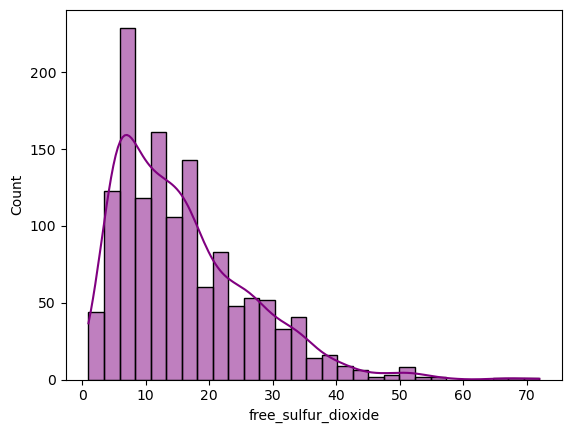

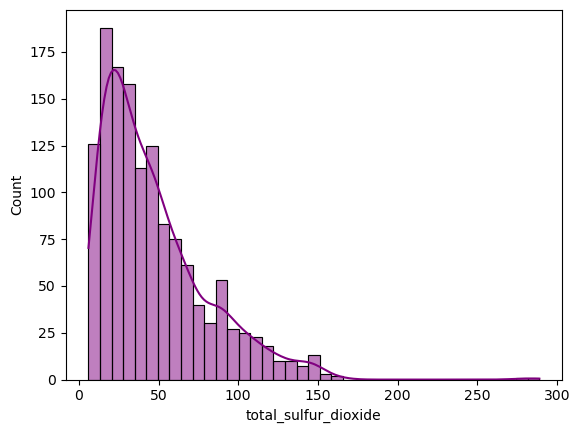

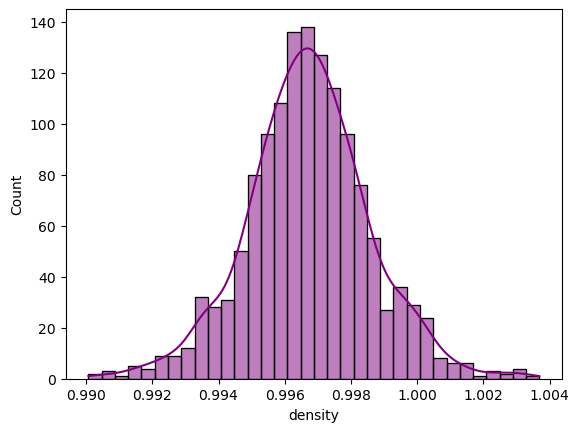

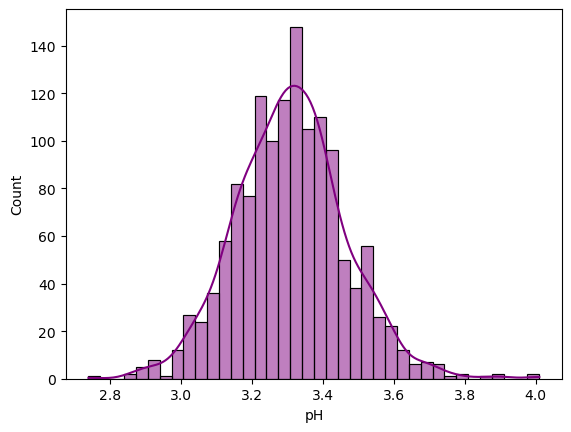

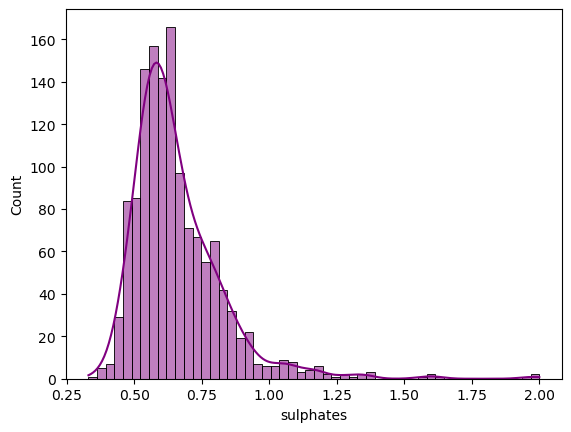

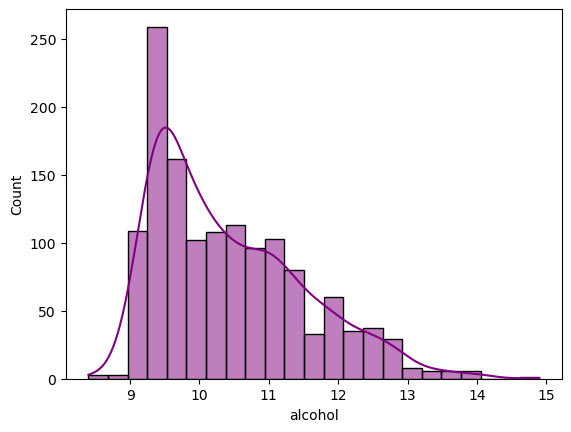

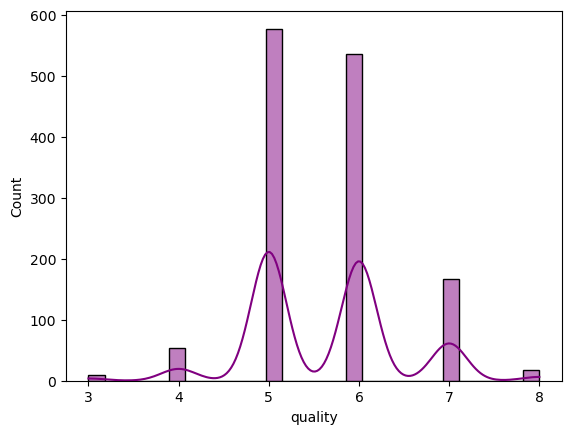

In [17]:
for i in df.columns:
    if df[i].dtypes !='object':
        sns.histplot(x=df[i],kde=True,color='purple')
        plt.show()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1359 non-null   float64
 1   volatile_acidity      1359 non-null   float64
 2   citric_acid           1359 non-null   float64
 3   residual_sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free_sulfur_dioxide   1359 non-null   float64
 6   total_sulfur_dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


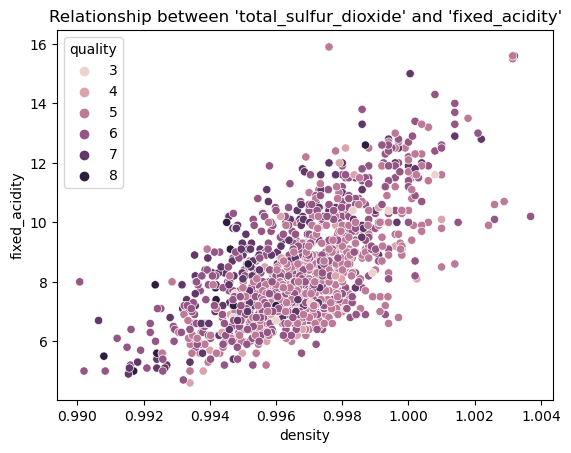

In [19]:
sns.scatterplot(x = "density",
                y = "fixed_acidity",
                hue = "quality",
                data = df).set(title = "Relationship between 'total_sulfur_dioxide' and 'fixed_acidity'");

<Axes: xlabel='quality', ylabel='density'>

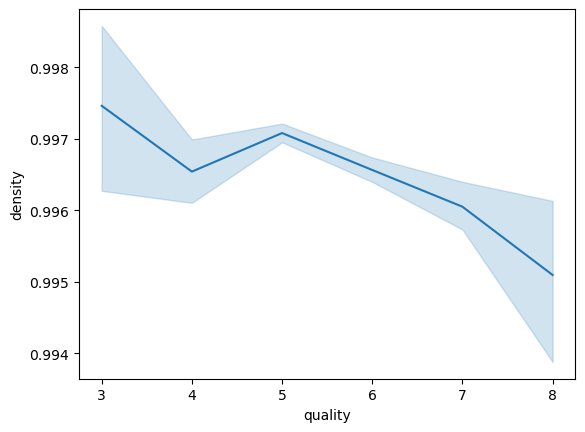

In [20]:
sns.lineplot(y=df.density,x=df.quality)

<Axes: xlabel='quality', ylabel='residual_sugar'>

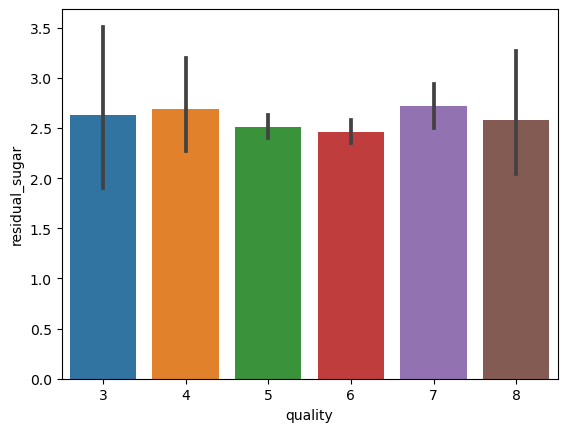

In [21]:
sns.barplot(y=df.residual_sugar,x=df.quality)

<Axes: xlabel='quality', ylabel='citric_acid'>

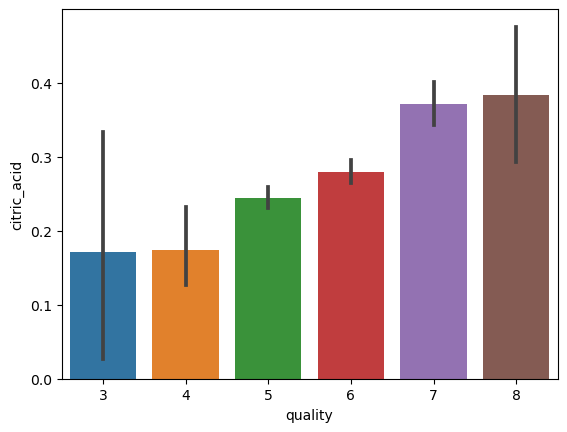

In [22]:
sns.barplot(y=df.citric_acid,x=df.quality)

<Axes: xlabel='quality', ylabel='sulphates'>

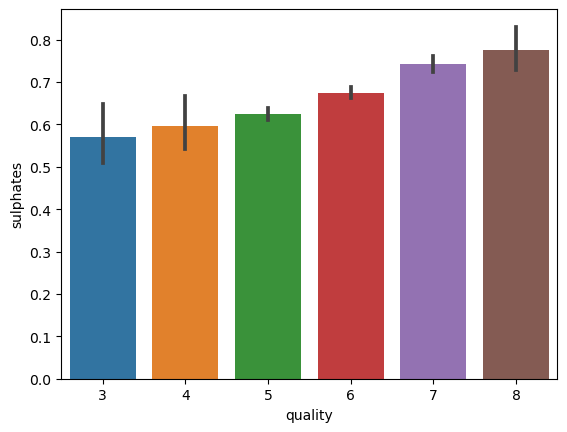

In [23]:
sns.barplot(y=df.sulphates,x=df.quality)

<Axes: xlabel='quality', ylabel='fixed_acidity'>

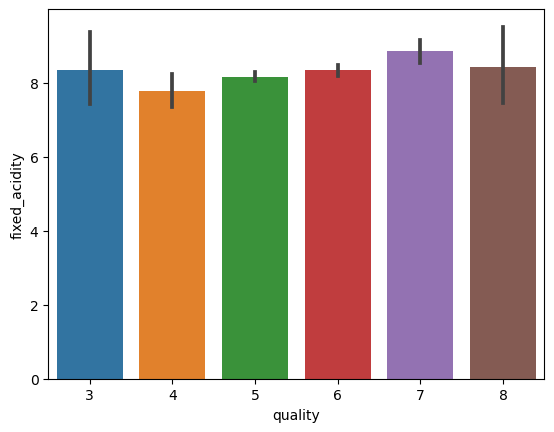

In [24]:
sns.barplot(y=df.fixed_acidity,x=df.quality)

<Axes: xlabel='quality', ylabel='pH'>

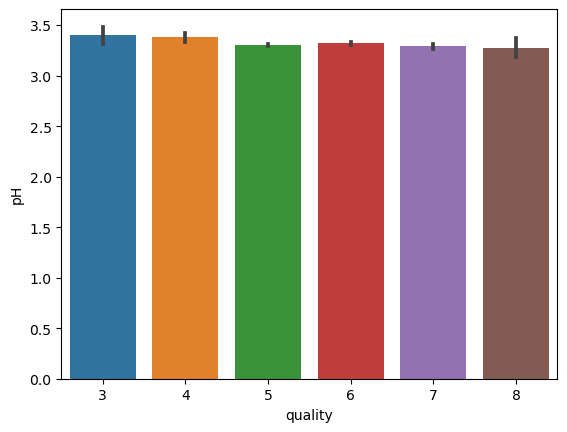

In [25]:
sns.barplot(y=df.pH,x=df.quality)

<Axes: xlabel='quality', ylabel='free_sulfur_dioxide'>

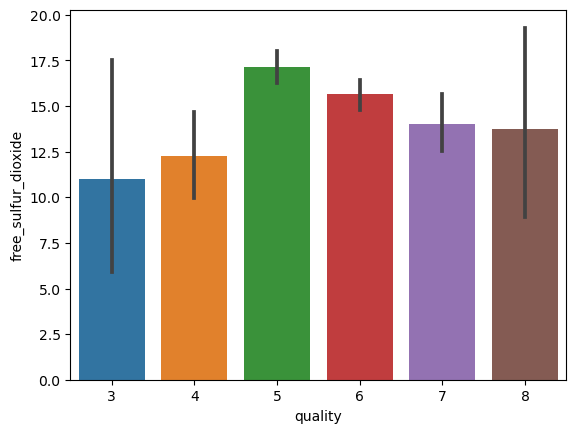

In [26]:
sns.barplot(y=df.free_sulfur_dioxide,x=df.quality)

<Axes: xlabel='quality', ylabel='total_sulfur_dioxide'>

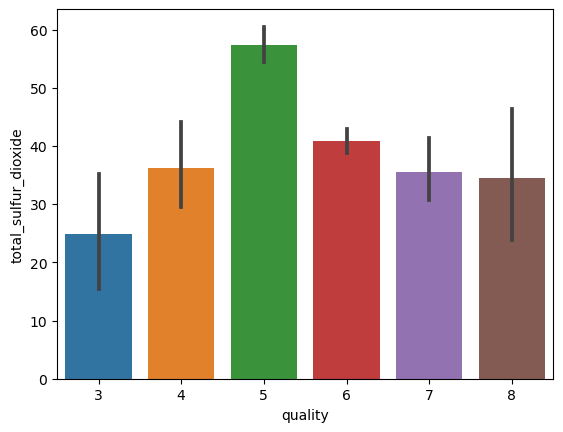

In [27]:
sns.barplot(y=df.total_sulfur_dioxide,x=df.quality)

<Axes: xlabel='quality', ylabel='volatile_acidity'>

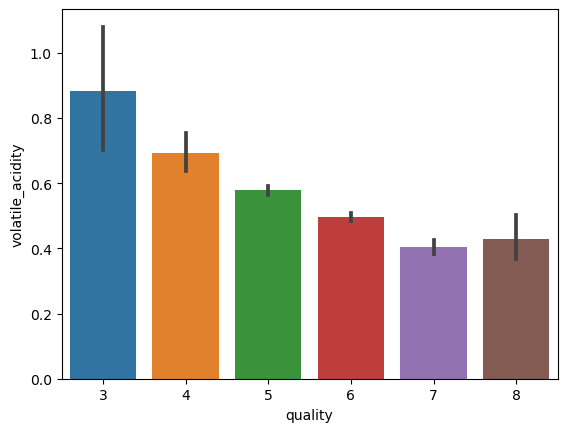

In [28]:
sns.barplot(y=df.volatile_acidity,x=df.quality)

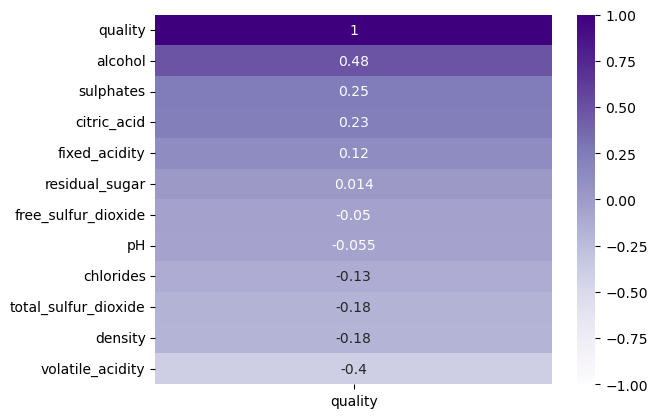

In [29]:
sns.heatmap(df.corr()[["quality"]].sort_values(by="quality", ascending=False), vmin=-1, vmax=1,annot=True, cmap="Purples");

In [30]:
df.corr()[["quality"]].sort_values(by="quality", ascending=False)

,quality
quality,1.000000
alcohol,0.480343
sulphates,0.248835
citric_acid,0.228057
fixed_acidity,0.119024
residual_sugar,0.013640
free_sulfur_dioxide,-0.050463
pH,-0.055245
chlorides,-0.130988
total_sulfur_dioxide,-0.177855


In [31]:
df["quality"] = np.where(df["quality"] > 5, 1, 0)
df["quality"]

0       0
1       0
2       0
3       1
5       0
       ..
1593    1
1594    0
1595    1
1597    0
1598    1
Name: quality, Length: 1359, dtype: int32

In [32]:
df.head().style.background_gradient(cmap = "Reds")

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,0
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,0
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,0
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,1
5,7.400000,0.660000,0.000000,1.800000,0.075000,13.000000,40.000000,0.997800,3.510000,0.560000,9.400000,0


In [33]:
x=df[['alcohol','sulphates','citric_acid']].values
y=df[['quality']].values


In [34]:
sc=StandardScaler()
x= sc.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=0)

In [35]:
models = {
    "LogisticRegression": LogisticRegression(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "RandomForestClassifier":RandomForestClassifier()
}

In [36]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="accuracy",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    print("Mean Score: ",np.mean(scores))
    print('*'*100)

cross validation model : LogisticRegression
Mean Score:  0.7012527233115469
****************************************************************************************************
cross validation model : DecisionTreeClassifier
Mean Score:  0.6232461873638344
****************************************************************************************************
cross validation model : GradientBoostingClassifier
Mean Score:  0.7123093681917211
****************************************************************************************************
cross validation model : RandomForestClassifier
Mean Score:  0.6747276688453159
****************************************************************************************************


In [37]:
# Training with Logistic Regression model

from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()

lr.fit(x_train,y_train)


LogisticRegression()

In [38]:
prediction1=lr.predict(x_train)

# Computing Model Accuracy of train data for Logistic regression

from sklearn.metrics import accuracy_score
lr_acc = accuracy_score(y_train, prediction1)
print("Accuracy score with train dataset for Logistic Regression:",lr_acc)

Accuracy score with train dataset for Logistic Regression: 0.7111315547378105


In [39]:
# Calculating Confusion matrix and Classification report for Logistic Regression

from sklearn.metrics import confusion_matrix,classification_report

print("Confusion Matrix: \n",confusion_matrix(y_train,prediction1))
print('\n')
print("Classification Report: \n",classification_report(y_train,prediction1))

Confusion Matrix: 
 [[377 139]
 [175 396]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.73      0.71       516
           1       0.74      0.69      0.72       571

    accuracy                           0.71      1087
   macro avg       0.71      0.71      0.71      1087
weighted avg       0.71      0.71      0.71      1087



In [40]:
#RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [41]:
prediction3=rfc.predict(x_train)


# Computing Model Accuracy of train data for Random Forest Classifier

from sklearn.metrics import accuracy_score
rfc_acc = accuracy_score(y_train, prediction3)

print("Accuracy score with train dataset for Random Forest Classifier:",rfc_acc)

Accuracy score with train dataset for Random Forest Classifier: 0.9917203311867525


In [42]:
#RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [43]:
prediction3=gbc.predict(x_train)


# Computing Model Accuracy of train data for Random Forest Classifier

from sklearn.metrics import accuracy_score
gbc_acc = accuracy_score(y_train, prediction3)

print("Accuracy score with train dataset for Random Forest Classifier:",gbc_acc)

Accuracy score with train dataset for Random Forest Classifier: 0.7819687212511499


In [44]:
print(lr_acc)
print(gbc_acc)
print(rfc_acc)

0.7111315547378105
0.7819687212511499
0.9917203311867525


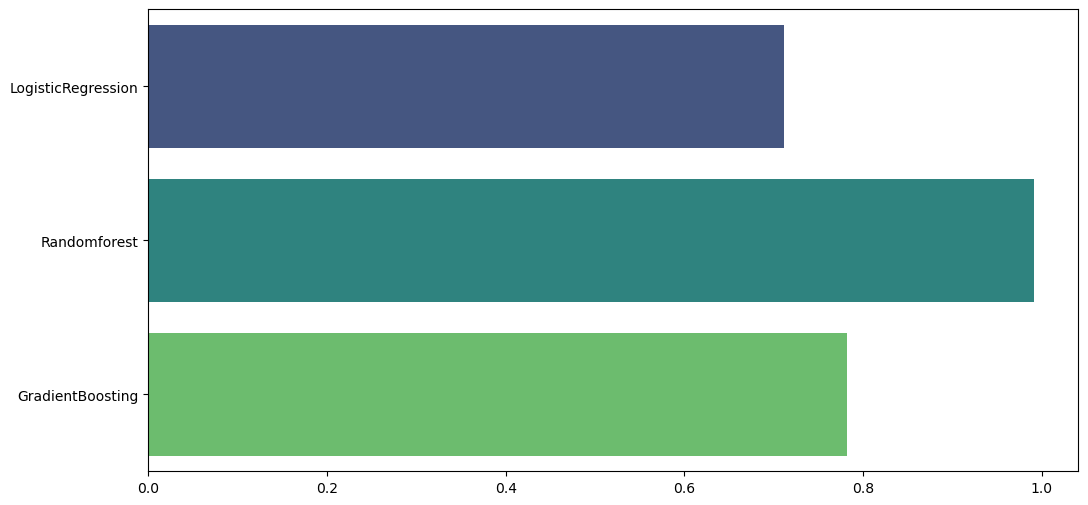

In [45]:
plt.figure(figsize=(12,6))
model_acc = [lr_acc,rfc_acc,gbc_acc]
model_name = ['LogisticRegression','Randomforest','GradientBoosting']
sns.barplot(x=model_acc, y=model_name,palette='viridis');

In [46]:
model = RandomForestClassifier()

In [47]:
model.fit(x_train, y_train)
print("model trained with {}".format(model))
score_train =accuracy_score (y_train, model.predict(x_train))
score_tst = accuracy_score(y_test, model.predict(x_test))
con_train = confusion_matrix(y_train, model.predict(x_train))
con_test = confusion_matrix(y_test, model.predict(x_test))
print("Model accuracy on train is:: ",score_train)
print("Model accuracy on test is:: ", score_tst)
print("confusion_matrix train is:: ", con_train)
print("confusion_matrix test is:: ", con_test)
print("Wrong Predictions made:",(y_test !=model.predict(x_test)).sum(),'/',((y_test == model.predict(x_test)).sum()+(y_test != model.predict(x_test)).sum()))
print("*"*60)

model trained with RandomForestClassifier()
Model accuracy on train is::  0.9917203311867525
Model accuracy on test is::  0.6654411764705882
confusion_matrix train is::  [[512   4]
 [  5 566]]
confusion_matrix test is::  [[ 79  45]
 [ 46 102]]
Wrong Predictions made: 36728 / 73984
************************************************************


In [48]:
OUTPUT= pd.DataFrame(zip(y,model.predict(x)), columns=("ACTUAL", "PREDICTION"), dtype = int)
OUTPUT

,ACTUAL,PREDICTION
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
1354,1,1
1355,0,1
1356,1,1
1357,0,0


Model used is::  RandomForestClassifier()


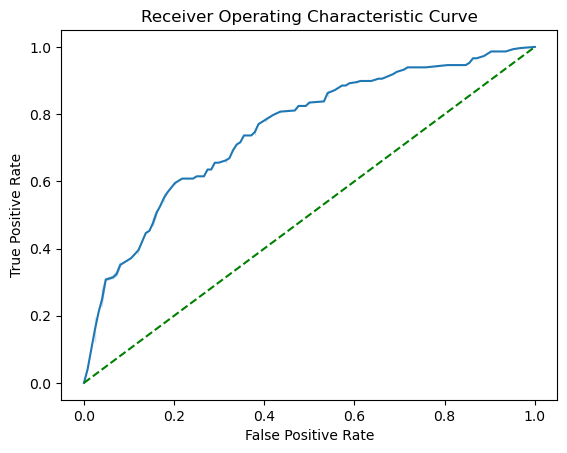

In [49]:
model.fit(x_train, y_train)
probs = model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
print("Model used is:: ",model)
sns.lineplot(x= fpr, y=tpr)
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.show()

### conclusion

#### In this analysis,RandomForestClassifier , we did extensive analysis of input data and were able to achieve Test Accuracy of 68%